# Read library for Data Modelling(Naive Bayes)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

data_path = ['data']
traindir = ['train']
testdir = ['test']

In [2]:
filepath = os.sep.join(data_path + ['winequality-white.csv'])
data = pd.read_csv(filepath, sep=',', header=0)

In [4]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

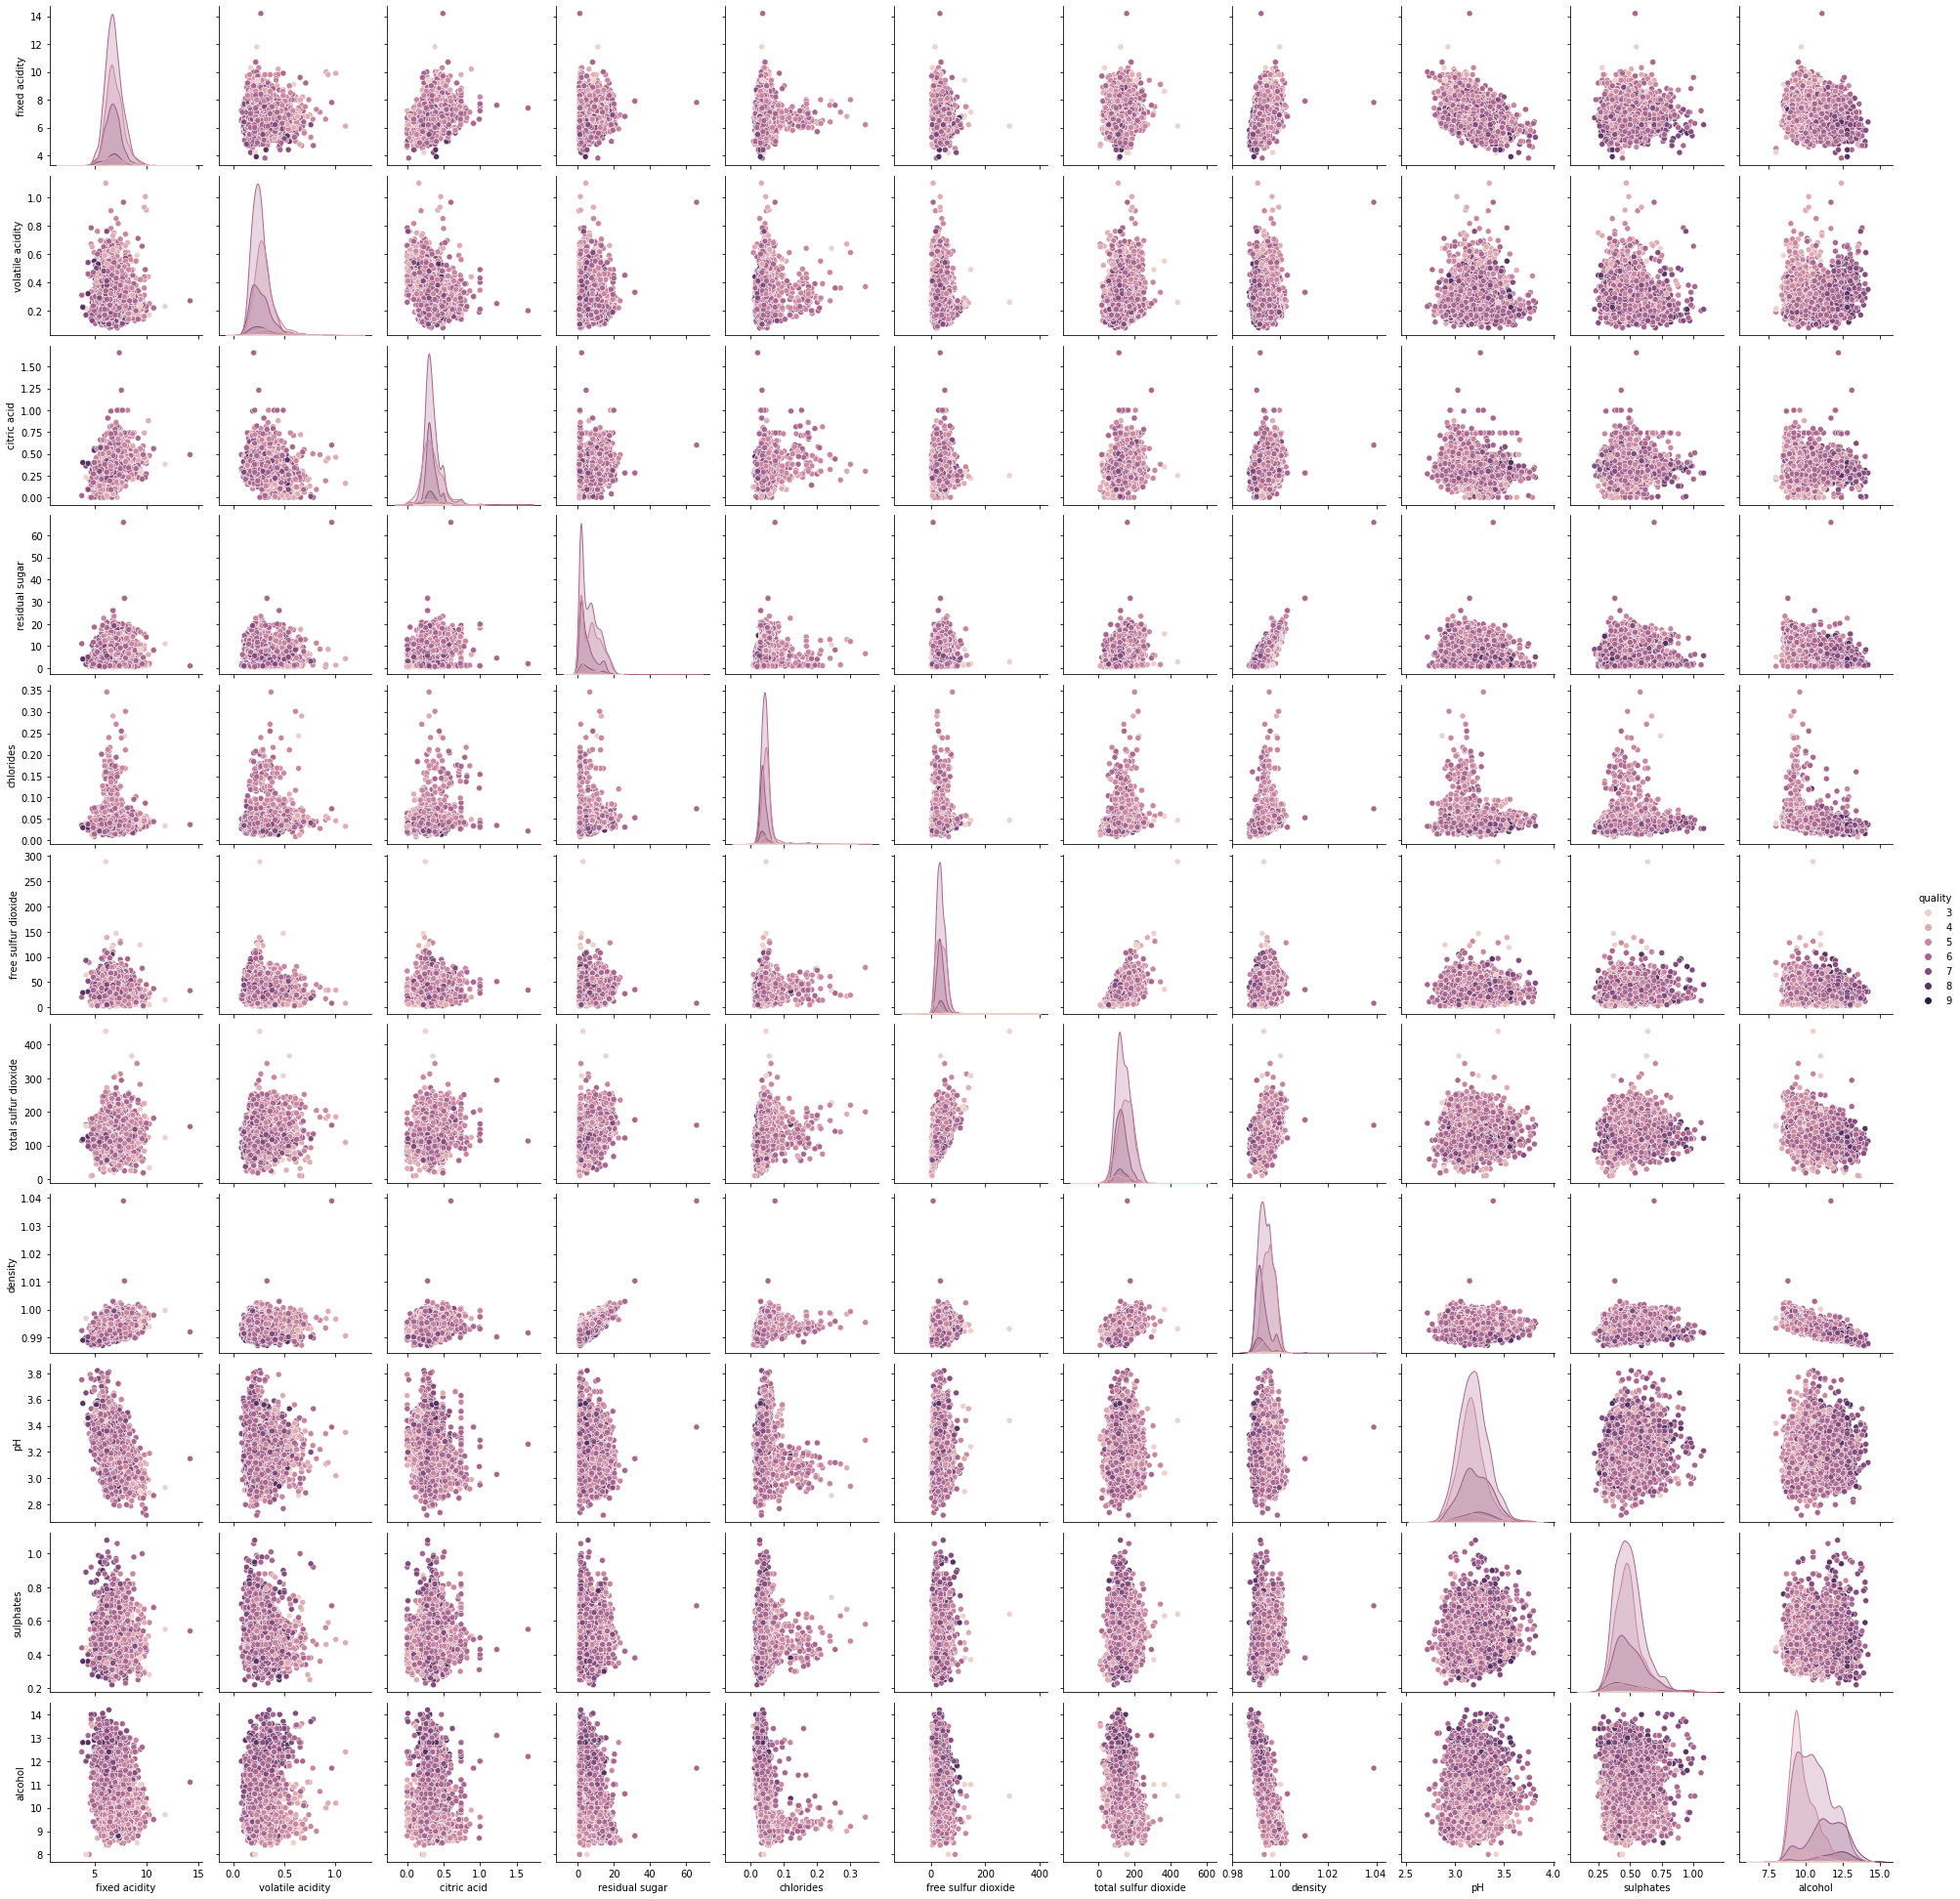

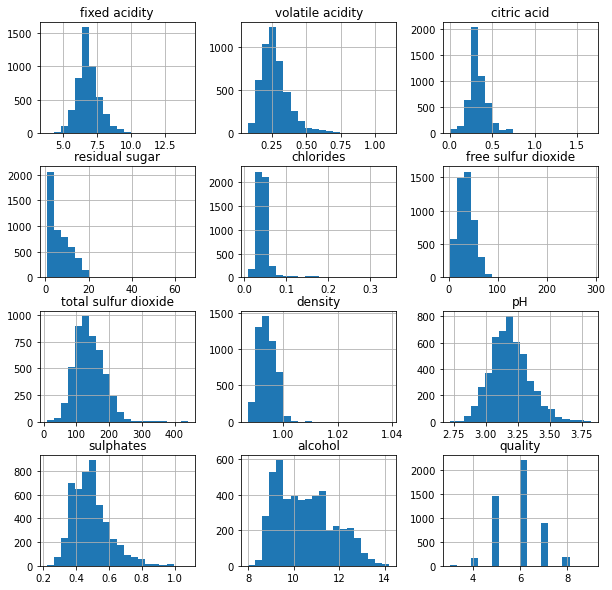

In [5]:
sns.pairplot(data, diag_kind = 'kde', hue = 'quality')
data.hist(bins=20,figsize=(10,10))
plt.show()

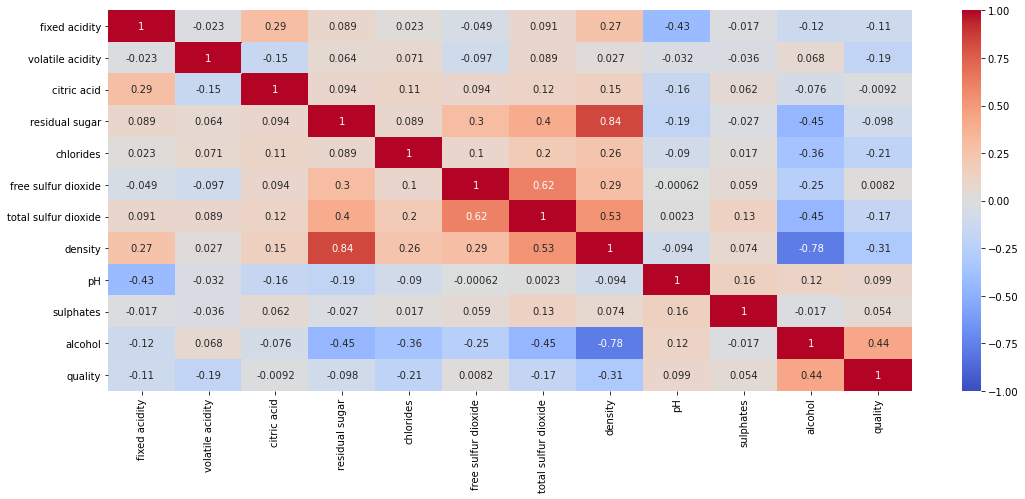

In [5]:
# correlation by visualization
plt.figure(figsize=[18,7])
# plot correlation
sns.heatmap(data.corr(),annot=True, vmin=-1,vmax=1, cmap="coolwarm")
plt.show()

# For Normal Dataset without Preprocessing

In [3]:
trainpath = os.sep.join(data_path + traindir + ['Train.csv'])

traindf = pd.read_csv(trainpath, sep = ",")
traindf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.25,0.30,14.40,0.052,40.0,183.0,0.99800,3.02,0.50,9.1,6
1,7.8,0.26,0.49,3.20,0.027,28.0,87.0,0.99190,3.03,0.32,11.3,7
2,6.3,0.23,0.33,1.50,0.036,15.0,105.0,0.99100,3.32,0.42,11.2,6
3,6.0,0.26,0.18,7.00,0.055,50.0,194.0,0.99591,3.21,0.43,9.0,5
4,7.9,0.37,0.31,2.85,0.037,5.0,24.0,0.99110,3.19,0.36,11.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3423,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9,6
3424,7.0,0.14,0.32,9.00,0.039,54.0,141.0,0.99560,3.22,0.43,9.4,6
3425,7.6,0.27,0.52,3.20,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,6
3426,6.3,0.24,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6


In [4]:
testpath = os.sep.join(data_path + testdir + ['Test.csv'])

testdf = pd.read_csv(testpath, sep = ",")
testdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7
1,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,8
2,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,8
3,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5
4,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6.4,0.29,0.18,15.0,0.040,21.0,116.0,0.99736,3.14,0.50,9.200000,5
1466,6.4,0.30,0.33,5.2,0.050,30.0,137.0,0.99304,3.26,0.58,11.100000,5
1467,7.0,0.40,0.25,1.8,0.050,51.0,189.0,0.99174,3.00,0.55,11.400000,6
1468,6.8,0.36,0.24,4.6,0.039,24.0,124.0,0.99090,3.27,0.34,12.600000,7


In [5]:
X_train = traindf.drop("quality", axis=1)
X_test = testdf.drop("quality", axis=1)
y_train = traindf["quality"]
y_test = testdf["quality"]

In [6]:
from sklearn.model_selection import train_test_split

x = data.drop(columns = 'quality')
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(x,y)

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()
cv_N = 5
scores = cross_val_score(gnb, x, y, n_jobs=cv_N, cv=cv_N)
print(scores)
np.mean(scores)

[0.44897959 0.44897959 0.44897959 0.44841675 0.44841675]


0.4487544558170561

In [7]:
from sklearn.model_selection import train_test_split

x = data.drop(columns = 'quality')
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(x,y)

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, x, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.4346598986887911,
 'bernoulli': 0.4487544558170561,
 'multinomial': 0.38730628921640153}

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         4
           4     0.2037    0.3143    0.2472        35
           5     0.5681    0.5636    0.5658       385
           6     0.5343    0.3327    0.4101       538
           7     0.3400    0.6909    0.4558       220
           8     0.0000    0.0000    0.0000        43

    accuracy                         0.4563      1225
   macro avg     0.2744    0.3169    0.2798      1225
weighted avg     0.4801    0.4563    0.4469      1225



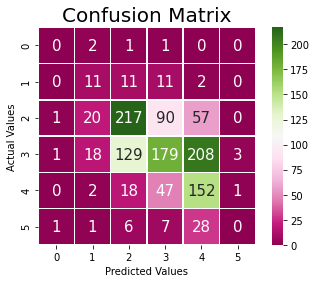

In [9]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
scores = gnb.score (X_test, y_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15});
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)
print(classification_report(y_test, y_pred, digits = 4))

# Accuracy Too Weak Try Use Modified Dataset

In [3]:
trainpath = os.sep.join(data_path + traindir + ['Train_Modified.csv'])

traindf = pd.read_csv(trainpath, sep = ",")
traindf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.25,0.30,14.40,0.052,40.0,183.0,0.99800,3.02,0.50,9.1,Poor
1,7.8,0.26,0.49,3.20,0.027,28.0,87.0,0.99190,3.03,0.32,11.3,Good
2,6.3,0.23,0.33,1.50,0.036,15.0,105.0,0.99100,3.32,0.42,11.2,Poor
3,6.0,0.26,0.18,7.00,0.055,50.0,194.0,0.99591,3.21,0.43,9.0,Poor
4,7.9,0.37,0.31,2.85,0.037,5.0,24.0,0.99110,3.19,0.36,11.9,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...
3423,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9,Poor
3424,7.0,0.14,0.32,9.00,0.039,54.0,141.0,0.99560,3.22,0.43,9.4,Poor
3425,7.6,0.27,0.52,3.20,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,Poor
3426,6.3,0.24,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,Poor


In [4]:
testpath = os.sep.join(data_path + testdir + ['Test_Modified.csv'])

testdf = pd.read_csv(testpath, sep = ",")
testdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,Good
1,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,Good
2,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,Good
3,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,Poor
4,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6.4,0.29,0.18,15.0,0.040,21.0,116.0,0.99736,3.14,0.50,9.200000,Poor
1466,6.4,0.30,0.33,5.2,0.050,30.0,137.0,0.99304,3.26,0.58,11.100000,Poor
1467,7.0,0.40,0.25,1.8,0.050,51.0,189.0,0.99174,3.00,0.55,11.400000,Poor
1468,6.8,0.36,0.24,4.6,0.039,24.0,124.0,0.99090,3.27,0.34,12.600000,Good


In [5]:
X_train = traindf.drop("quality", axis=1)
X_test = testdf.drop("quality", axis=1)
y_train = traindf["quality"]
y_test = testdf["quality"]

              precision    recall  f1-score   support

        Good     0.4079    0.6869    0.5119       329
        Poor     0.8876    0.7125    0.7905      1141

    accuracy                         0.7068      1470
   macro avg     0.6477    0.6997    0.6512      1470
weighted avg     0.7802    0.7068    0.7281      1470



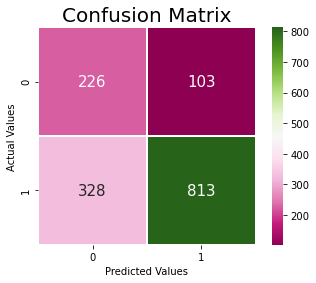

In [6]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
scores = gnb.score (X_test, y_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15});
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)
print(classification_report(y_test, y_pred, digits = 4))

## Try use StandardScaler & MinMaxScaler to improve accuracy

In [18]:
X_train = traindf.drop("quality", axis=1)
X_test = testdf.drop("quality", axis=1)
y_train = traindf["quality"]
y_test = testdf["quality"]

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

              precision    recall  f1-score   support

        Good     0.4065    0.6809    0.5091       329
        Poor     0.8857    0.7134    0.7903      1141

    accuracy                         0.7061      1470
   macro avg     0.6461    0.6971    0.6497      1470
weighted avg     0.7785    0.7061    0.7274      1470



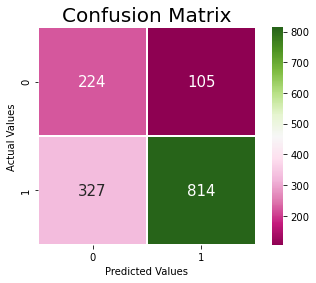

In [18]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
scores = gnb.score (X_test, y_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15});
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)
print(classification_report(y_test, y_pred, digits = 4))

In [19]:
scaler = MinMaxScaler()
# fit the scal
scal_fit = scaler.fit(X_train)
# transformation of training data
X_train = scal_fit.transform(X_train)
# transformation of testing data
X_test = scal_fit.transform(X_test)

              precision    recall  f1-score   support

        Good     0.4061    0.6839    0.5096       329
        Poor     0.8865    0.7117    0.7895      1141

    accuracy                         0.7054      1470
   macro avg     0.6463    0.6978    0.6496      1470
weighted avg     0.7790    0.7054    0.7269      1470



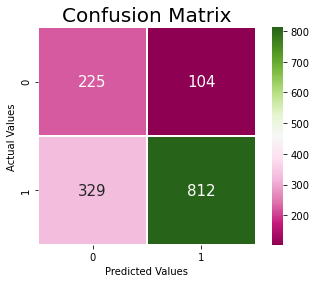

In [20]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
scores = gnb.score (X_test, y_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15});
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)
print(classification_report(y_test, y_pred, digits = 4))

## Because of using StandardScaler & MinMaxScaler are reducing the accuracy, So I use the original Accuracy without any scaler.

# Try to Improve Accuracy
- Remove features and left density and alcohol as key features

In [21]:
X_train = traindf[['density','alcohol']]
X_test = testdf[['density','alcohol']]
y_train = traindf["quality"]
y_test = testdf["quality"]

              precision    recall  f1-score   support

        Good     0.5157    0.4498    0.4805       329
        Poor     0.8470    0.8782    0.8623      1141

    accuracy                         0.7823      1470
   macro avg     0.6813    0.6640    0.6714      1470
weighted avg     0.7728    0.7823    0.7769      1470



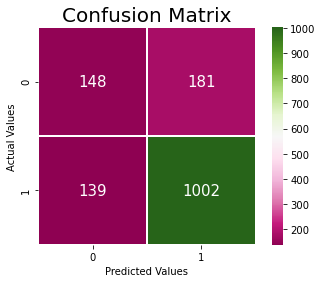

In [22]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
scores = gnb.score (X_test, y_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15});
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)
print(classification_report(y_test, y_pred, digits = 4))

In [21]:
scaler = MinMaxScaler()
# fit the scal
scal_fit = scaler.fit(X_train)
# transformation of training data
X_train = scal_fit.transform(X_train)
# transformation of testing data
X_test = scal_fit.transform(X_test)

              precision    recall  f1-score   support

        Good     0.5157    0.4498    0.4805       329
        Poor     0.8470    0.8782    0.8623      1141

    accuracy                         0.7823      1470
   macro avg     0.6813    0.6640    0.6714      1470
weighted avg     0.7728    0.7823    0.7769      1470



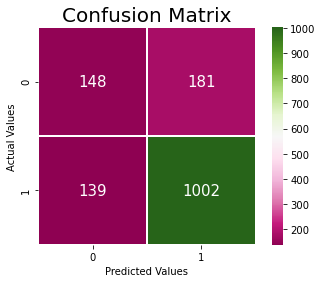

In [22]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
scores = gnb.score (X_test, y_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15});
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)
print(classification_report(y_test, y_pred, digits = 4))

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

              precision    recall  f1-score   support

        Good     0.5123    0.4438    0.4756       329
        Poor     0.8456    0.8782    0.8616      1141

    accuracy                         0.7810      1470
   macro avg     0.6789    0.6610    0.6686      1470
weighted avg     0.7710    0.7810    0.7752      1470



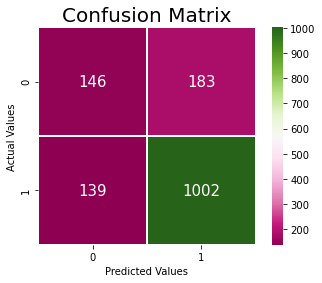

In [25]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
scores = gnb.score (X_test, y_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15});
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)
print(classification_report(y_test, y_pred, digits = 4))

# Try Using Five features to increase Accuracy

In [23]:
X_train = traindf[['density','alcohol', 'chlorides', 'volatile acidity', 'total sulfur dioxide']]
X_test = testdf[['density','alcohol', 'chlorides', 'volatile acidity', 'total sulfur dioxide']]
y_train = traindf["quality"]
y_test = testdf["quality"]

              precision    recall  f1-score   support

        Good     0.4556    0.6231    0.5263       329
        Poor     0.8784    0.7853    0.8292      1141

    accuracy                         0.7490      1470
   macro avg     0.6670    0.7042    0.6778      1470
weighted avg     0.7838    0.7490    0.7614      1470



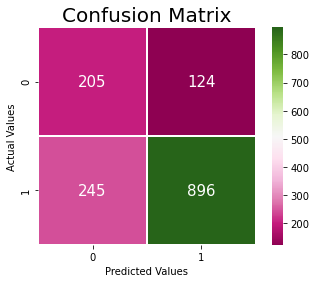

In [24]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
scores = gnb.score (X_test, y_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15});
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)
print(classification_report(y_test, y_pred, digits = 4))

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

              precision    recall  f1-score   support

        Good     0.4461    0.6292    0.5221       329
        Poor     0.8787    0.7748    0.8235      1141

    accuracy                         0.7422      1470
   macro avg     0.6624    0.7020    0.6728      1470
weighted avg     0.7819    0.7422    0.7560      1470



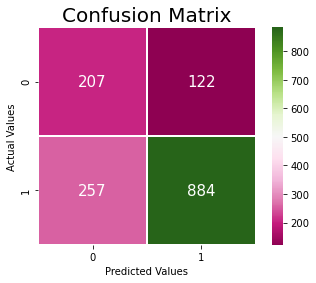

In [8]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
scores = gnb.score (X_test, y_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15});
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)
print(classification_report(y_test, y_pred, digits = 4))

In [10]:
X_train = traindf[['density','alcohol', 'chlorides', 'volatile acidity', 'total sulfur dioxide']]
X_test = testdf[['density','alcohol', 'chlorides', 'volatile acidity', 'total sulfur dioxide']]
y_train = traindf["quality"]
y_test = testdf["quality"]

In [11]:
scaler = MinMaxScaler()
# fit the scal
scal_fit = scaler.fit(X_train)
# transformation of training data
X_train = scal_fit.transform(X_train)
# transformation of testing data
X_test = scal_fit.transform(X_test)

              precision    recall  f1-score   support

        Good     0.4481    0.6292    0.5234       329
        Poor     0.8790    0.7765    0.8246      1141

    accuracy                         0.7435      1470
   macro avg     0.6635    0.7028    0.6740      1470
weighted avg     0.7825    0.7435    0.7572      1470



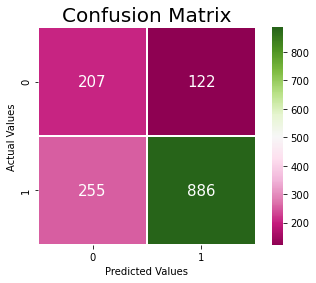

In [12]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
scores = gnb.score (X_test, y_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15});
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)
print(classification_report(y_test, y_pred, digits = 4))

## Because the accuracy is decrease,  I will choose the accuracy of two features as Final NaiveBayes Model = 78.23%